# Our Project 

Hip-hop and rap is a genre that has had an unprecedented origin and evolution in the past forty years. “Hip-Hop Evolution” is a documentary series that does an incredible job in tracking thse origins and early manifestations of rap and hip-hop. Their narrative starts in the Southern Bronx of New Year City and follows the largest visionaries and musical innovators of the time up until 1994 when rap officially enters the “mainstream". The documentary functions as an anthropological escapade, relying on interviews with a broad range of individuals involved in the genre’s creation. It pieces together a narrative that explains how rap and hip hop emerged as both a technological and sociological innovation-- tracking lyrical themes from their begining as in the exclusive purpose of party entertainment in the late 1970s, to how it became a medium for proposing commentary and reflection on the reality of poor neighborhoods and being Black American in the early 1990s. Though we believe the documentory has done an impressive job in tracing rap and hip-hop's origins, our project is interested in investigating the evolution of the genre after the series ends. 

#### We want to know how has rap and hip-hop has evolved since it entered the mainstream? How does this differ from its underground roots? And what sociological events have motivated recent modifications?

### Our hypothesis 

Many indivduals today would argue that rap and hip-hop is a genre that has always been concerned with commenting and reflecting on reality. The "Hip-Hop Evolution" cites that this is not necessarily true, reflection was something that had to be developed in rap, as the genre first manifested as a product of disco and partying. 

In rap's origins MCs dominated the social scene, writing music about partying and women which subsequently served as assertions of status in their neighborhood and community. After the song, “The Message” by Grandmaster Flash and The Furious Five came out in 1982, rap and hip-hop saw a glimpse of what the top songs in the coming decade would discuss. The 1980s was a dynamic and difficult time for urban America, especially for impoverished black communities. Reaganomics, the emergence of crack, the War on Drugs, gang violence, and discrimination all had tremendous influence, and it was during this period, that for the first time, these issues began manifesting themselves as lyrical topics in music.  


Furthermore, as the documentary series comes to a close, it discusses how the popularity of rap and hip-hop was being spread throughout a variety of youth listeners in the United States. The heightened popularity seen in the early 1990s set presidency for a new type of rap and hip-hop, as rappers transitioned from underground artists to reaping the same fame and notoriety of pop stars. 

Give this consideration, we hypothesize that as rap and hip-hop enter the mainstream in the early 1990s, we will see an increase in lyrical content that pivots from the iteration of black American experience to conventional themes in popular music such as love/sex, fame, and status/power. 


#### We believe that this question is best answered through computational analysis because it is fast, just as thorough as hand-coding, and will allow us the ability to look at an extensive corpus (80% of commercially successful hip-hop and rap songs in the past two decades).  


# Through What Means

Our project first starts with topic-modeling, as we are looking to partially corroborate the themes noted throughout the documentary film “Hip-Hop Evolution”. 

After this we will be examining the more specific elements of our investigation, comparing thematic changes over time as rap enters the mainstream. We will be relying on LIWC dictionaries that are associated with our analysis from the topic-modeling computation. We acknowledge that this process has a potential for bias, and that involves much speculation that our interpreted topic modeling categories are correct, and that they relate to the LIWC dictionaries provided. 

- add LIWC graphs money, power, sex, leisure, swear, anger, give general anaylsis of the intersectionality of these topics

In [130]:
import pandas
from ast import literal_eval
import nltk
from nltk import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
import string
import re

#read the dictionary words into a Pandas dataframe
dict_df = pandas.read_csv("../data/LIWC2015-dictionaries.csv", encoding='utf-8', header=3)


lyrics_df = pandas.read_csv("../data/bbtop15-lyrics-tokenized.csv",converters={'tokens_lower':literal_eval, 'tokens_lower_clean':literal_eval } )

#drop rows where the text is missing.
lyrics_df  = lyrics_df.dropna(subset=['lyrics'])

lyrics_df

,track_id,track,artist,artist_gender,date,year,lyrics,lyrics_clean,tokens,tokens_lower,tokens_lower_clean,tokens_lower_clean_stopfree,tokens_lower_clean_stopfree_stem
0,0,Me So Horny,The 2 Live Crew,Male,1989-11-04,1989,"\n\n[Intro]\n""What'll we get for 10 dollars?""\...","\n\n\n""Whatll we get for 10 dollars?""\n""Every ...","['""Whatll', 'we', 'get', 'for', '10', 'dollars...","[""whatll, we, get, for, 10, dollars?"", ""every,...","[whatll, we, get, for, 10, dollars, every, tin...","['whatll', 'get', 'dollars', 'every', 'ting', ...","['whatll', 'get', 'dollar', 'everi', 'ting', '..."
1,1,Bust A Move,Young M.C.,Male,1989-11-04,1989,\n\n[Intro]\nBust it\n\n[Verse 1]\nThis here's...,\n\n\nBust it\n\n\nThis heres a jam for all th...,"['Bust', 'it', 'This', 'heres', 'a', 'jam', 'f...","[bust, it, this, heres, a, jam, for, all, the,...","[bust, it, this, heres, a, jam, for, all, the,...","['bust', 'heres', 'jam', 'fellas', 'tryin', 'l...","['bust', 'here', 'jam', 'fella', 'tryin', 'lad..."
2,2,Smooth Operator,Big Daddy Kane,Male,1989-11-04,1989,"\n\n[Verse 1]\nWell excuse me, take a few minu...","\n\n\nWell excuse me, take a few minutes, to m...","['Well', 'excuse', 'me,', 'take', 'a', 'few', ...","[well, excuse, me,, take, a, few, minutes,, to...","[well, excuse, me, take, a, few, minutes, to, ...","['well', 'excuse', 'take', 'minutes', 'mellow'...","['well', 'excus', 'take', 'minut', 'mellow', '..."
3,3,Cha Cha Cha,MC Lyte,Female,1989-11-04,1989,\n\n[Kick this one here for me and my DJ]\n\nY...,\n\n\n\nYou can cha-cha-cha to this Mardis Gra...,"['You', 'can', 'cha-cha-cha', 'to', 'this', 'M...","[you, can, cha-cha-cha, to, this, mardis, gras...","[you, can, chachacha, to, this, mardis, gras, ...","['chachacha', 'mardis', 'gras', 'im', 'dopest'...","['chachacha', 'mardi', 'gras', 'im', 'dopest',..."
4,4,I Go To Work,Kool Moe Dee,Male,1989-11-04,1989,\n\n[Verse 1]\nI go to work like a doctor\nWhe...,\n\n\nI go to work like a doctor\nWhen I rock ...,"['I', 'go', 'to', 'work', 'like', 'a', 'doctor...","[i, go, to, work, like, a, doctor, when, i, ro...","[i, go, to, work, like, a, doctor, when, i, ro...","['go', 'work', 'like', 'doctor', 'rock', 'mic'...","['go', 'work', 'like', 'doctor', 'rock', 'mic'..."
5,5,New Jack Swing,Wreckx-N-Effect,Male,1989-11-04,1989,"\n\nYo Wreckx-N-Effect\nIn full effect!\n(""Wor...","\n\nYo Wreckx-N-Effect\nIn full effect!\n(""Wor...","['Yo', 'Wreckx-N-Effect', 'In', 'full', 'effec...","[yo, wreckx-n-effect, in, full, effect!, (""wor...","[yo, wreckxneffect, in, full, effect, word, up...","['yo', 'wreckxneffect', 'full', 'effect', 'wor...","['yo', 'wreckxneffect', 'full', 'effect', 'wor..."
6,6,They Put Me In The Mix,M.C. Hammer,Male,1989-11-04,1989,\n\n[Hammer]\nYo! My Lone Mixer\nYou ready?\nB...,\n\n\nYo! My Lone Mixer\nYou ready?\nBust it!\...,"['Yo!', 'My', 'Lone', 'Mixer', 'You', 'ready?'...","[yo!, my, lone, mixer, you, ready?, bust, it!,...","[yo, my, lone, mixer, you, ready, bust, it, lo...","['yo', 'lone', 'mixer', 'ready', 'bust', 'lone...","['yo', 'lone', 'mixer', 'readi', 'bust', 'lone..."
7,7,Just A Friend,Biz Markie,Male,1989-11-04,1989,\n\n[Intro]\nHave you ever met a girl that you...,\n\n\nHave you ever met a girl that you tried ...,"['Have', 'you', 'ever', 'met', 'a', 'girl', 't...","[have, you, ever, met, a, girl, that, you, tri...","[have, you, ever, met, a, girl, that, you, tri...","['ever', 'met', 'girl', 'tried', 'date', 'year...","['ever', 'met', 'girl', 'tri', 'date', 'year',..."
8,8,It's Funky Enough,The D.O.C.,Male,1989-11-04,1989,\n\n[Intro]\nY'all ready for this\nRastafara S...,\n\n\nYall ready for this\nRastafara Sonna Mad...,"['Yall', 'ready', 'for', 'this', 'Rastafara', ...","[yall, ready, for, this, rastafara, sonna, mad...","[yall, ready, for, this, rastafara, sonna, mad...","['yall', 'ready', 'rastafara', 'sonna', 'madda...","['yall', 'readi', 'rastafara', 'sonna', 'madda..."
9,9,Somebody For Me,Heavy D & The Boyz,Male,1989-11-04,1989,\n\nOh yeah..\n\nLove somebo-dy...


# Background on the Corpus 

We composed our corpus of rap lyrics by first making a list of all the rap songs that have appeared on the Billboard Hot Rap Songs list from 1989-2016 (http://www.billboard.com/charts/rap-song).

To get the lyrics, we wrote a script that scraped 2317 lyrics from the well-established lyrics site Rap Genius(https://genius.com). That is about 81% of all the songs that appears on the list during the specified time period. The figure bellow illustrated how the lyrics are distributed across time. Our corpus also necessitated computational cleaning in removing variables such as uppercase letters, punctuation, etc.. 

This data collection functions as an appropriate selection for our investigation as we are interested in tracking how **recent** manifestations of hip-hop and rap have evolved as (A) a product of being in the **mainstream** (hence why we selected Billboard Hot Rap Songs), and (B) through modern sociological conditions of the time (we wanted to study influences after 1994, where hip-hop and rap historically has entered the mainstream). 

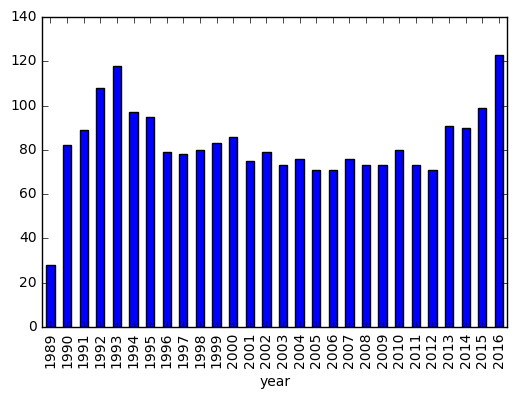

In [161]:
grouped_year = lyrics_df.groupby("year")
grouped_year['lyrics'].count().plot(kind = 'bar')
plt.show()

# I. Topic Modeling of Notable Themes

In this section, we are interested in noting some of what computational analysis will prescribe as the most notable themes in recent, mainstream rap and hip-hop. We decide to define the corpus with six topics to get a range and hopefully account for unusual phrasing, slang, and errors in tokenizing that would occur considering the unique syntax of rap and hip-hop lyrics. In this section, we are partially looking to validate previous research that suggests partying, money, violence/gangs, status (must acknowledge that this may have led to bias in our interpretation). 

In [132]:
####Adopted From: 
#Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

n_samples = 2317
n_topics = 6
n_top_words = 80

##This is a function to print out the top words for each topic in a pretty way.
#Don't worry too much about understanding every line of this code.
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [133]:
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.80, min_df=50,
                                max_features=None,
                                stop_words='english'
                                )

tf = tf_vectorizer.fit_transform(df.lyrics_clean)

Extracting tf features for LDA...


In [134]:
print("Fitting LDA models with tf features, "
      "n_samples=%d and n_topics=%d..."
      % (n_samples, n_topics))

#define the lda function, with desired options
#Check the documentation, linked above, to look through the options
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=20,
                                learning_method='online',
                                learning_offset=80.,
                                total_samples=n_samples,
                                random_state=0)
#fit the model
lda.fit(tf)

Fitting LDA models with tf features, n_samples=2317 and n_topics=6...


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=80.0,
             max_doc_update_iter=100, max_iter=20, mean_change_tol=0.001,
             n_jobs=1, n_topics=6, perp_tol=0.1, random_state=0,
             topic_word_prior=None, total_samples=2317, verbose=0)

In [135]:
print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model:

Topic #0:
love night good new long used need city thing ll day girl feeling youre let right boy mean better dont don old heart live make left going want time just tell mind little really baby feel whats things cause told women yeah ya hit talk aint hate ive gon lot em home gone world thats friends believe girls round looking body wrong fuck hoes hard said leave game oh seen wont young coming real open bout couple think man niggas

Topic #1:
work look gonna doing girl roll don little gotta let hard ya baby cause aint god black heard come drink damn girls smoke man dont bring youre right gon best whats everybody car wanna ll club thing play say bad thats friends good body left make believe live ball boy care party better oh time day said ain pay long home hate free start walk need really want just em hot song weed round talking beat probably gone theres feeling

Topic #2:
money just nigga young bitch dope night gon hold em hoes day time party girl ho hey cash ball 

## Analysis on Topic Modeling 

Our interpretation of the six topics we found evidence for include: 
- Topic 0: "Sex and Love"
- Topic 1: "Social Gatherings and Celebration" 
- Topic 2: "Appeal for Status" 
- Topic 3: "Assertion of Power" 
- Topic 4: "Coquettish Rhetoric" 
- Topic 5: "Gangs, Ghettos, and Violence".

These topics have shifted slightly since the first time we attempted this same analysis. This is because we cleaned up the corpus more by ** insert phrase here **.

**clarify are we going to track these topic over time?**

Insofar as corroborating our previous research of rap and hip-hop lyrical themes, this computational method supports the suggestions taken from the "Evolution of Hip-Hop" documentary that suggest that much lyrical inspiration has come from  "partying", "women", and the "reality of black, urban neighborhoods". If our hypothesis (that rap and hip-hop have reflected less meaningful content as it is increasingly commercialized) is correct, we should see increases in lyrical reference to all of the topics over time, except for Topic 5. We interpret Topic 5 to be a product of the reminiscence of "gangster rap". According to the "Evolution of Hip-Hop", gangster rap was a style of rap/hip-hop that had its origins in California in the late 80s and was popularized by groups such as Ice-T, Dr. Dre, and NWA. 

We would like to take this analysis a step further my examining specific topics. This leads us to Part II of our project. 

# II. Examining Specific Topics 

In this section, we will be examining some of the most notable themes that surfaced through our previous research and topic modeling. Though we went through several prototypes in how to best do this investigation, we decided that we will be relying on LIWC dictionaries. 

As a result of this reliance, the themes that we will be looking into are products of the LIWC preexisting categories. The relevant categories we found include: money, power, sex, anger, leisure, and swear words. We acknowledge that dictionary methods and their subsequent interpretation carry some inherent biases. 

In [136]:
## Update columns of the dictionary df

new_columns =['Function1', 'Function2', 'Function3', 'Function4', 'Pronoun', 'Ppron', 'I', 'We', 'You', 'SheHe', 'They', 'Ipron', 'Article', 'Prep', 'Auxverb', 'Adverb', 'Conj', 'Negate', 'Verb1', 'Verb2', 'Verb3', 'Verb4', 'Verb5', 'Verb6', 'Verb7', 'Adj1', 'Adj2', 'Adj3', 'Adj4', 'Adj5', 'Compare', 'Unnamed: 31', 'Unnamed: 32', 'Interrog', 'Number', 'Quant', 'Affect', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Posemo1', 'Posemo2', 'Posemo3', 'Posemo4', 'Posemo5', 'Negemo1', 'Negemo2', 'Negemo3', 'Negemo4', 'Negemo5', 'Anx', 'Anger1', 'Anger2', 'Sad', 'Social', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Family', 'Friend', 'Female', 'Male', 'CogProc', 'Unnamed: 70', 'Unnamed: 71', 'Unnamed: 72', 'Unnamed: 73', 'Unnamed: 74', 'Insight1', 'Insight2', 'Cause', 'Discrep', 'Tentat', 'Unnamed: 80', 'Certain', 'Differ', 'Percent', 'Unnamed: 84', 'Unnamed: 85', 'See', 'Hear', 'Feel', 'Bio', 'Unnamed: 90', 'Unnamed: 91', 'Unnamed: 92', 'Unnamed: 93', 'Body1', 'Body2', 'Health1', 'Health2', 'Sexual', 'Ingest1', 'Ingest2', 'Drives1', 'Drives2', 'Drives3', 'Drives4', 
'Drives5', 
'Drives6', 
'Drives7', 
'Drives8', 
'Affiliation1', 
'Affiliation2', 
'Achieve1', 
'Achieve12', 
'Power1',
 'Power2', 
'Power3', 
'Power4', 
'Reward', 'Risk', 
'FocusPast', 
'Unnamed: 120',
 'Unnamed: 121', 
'FocusPresent', 
'Unnamed: 123', 
'Unnamed: 124', 
'FocusFuture', 
'Relativ', 
'Unnamed: 127', 
'Unnamed: 128', 
'Unnamed: 129', 
'Unnamed: 130', 
'Unnamed: 131', 
'Unnamed: 132', 
'Motion', 
'Unnamed: 134', 
'Unnamed: 135', 
'Space', 
'Unnamed: 137',
 'Unnamed: 138',
 'Time', 
'Unnamed: 140', 
'Work1', 
'Work2', 
'Work13', 
'Leisure1', 
'Leisure2', 
'Home', 
'Money1', 
'Money2', 
'Relig', 
'Unnamed: 150', 
'Death', 
'Informal1', 
'Informal2', 
'Informa3', 
'Swear', 
'Netspeak1', 
'Netspeak2', 
'Assent', 
'Nonflu', 
'Filler']




In [137]:
new_columns = [column.lower() for column in new_columns]
dict_df.columns = new_columns

In [138]:
#Function that return the dictionary that i want to investigate
def get_dict(df, label):
    df_dict =  df[lambda df: [column for column in df.columns if re.match(label + "*", column)]]
    words = []
    cols = df_dict.columns
    for col in cols:
        words += df_dict[col].tolist()
        
    ##Remove star
    return [word for word in words if str(word) != "nan"]

In [139]:
#dict_df[lambda df: [column for column in df.columns if re.match(r"function*", column)]]

money_dict = get_dict(dict_df, "money")

In [140]:
lyrics_df['token_count'] = lyrics_df['tokens_lower_clean'].apply(lambda x: len(x))

In [141]:
#creating dictionary counts

def dict_count(tokens, dictionary):
    count = 0
    for token in tokens:
        for word in dictionary: 
            if word[-1] =='*':
                search_string=word[0:-1]
                if re.match(search_string, token):
                    count += 1
                    #print(token)
                    #print(word)
            else:
                if word == token:
                    count += 1
                    #print(token)
                    #print(word)
    return count

 ## Investigation of Money

In [142]:
lyrics_df['money_count'] = lyrics_df['tokens_lower_clean'].apply(lambda x: dict_count(x, money_dict))

In [143]:
lyrics_df['money_ratio'] = lyrics_df['money_count'] / lyrics_df['token_count']

In [144]:
groupedby_year = lyrics_df.groupby('year')

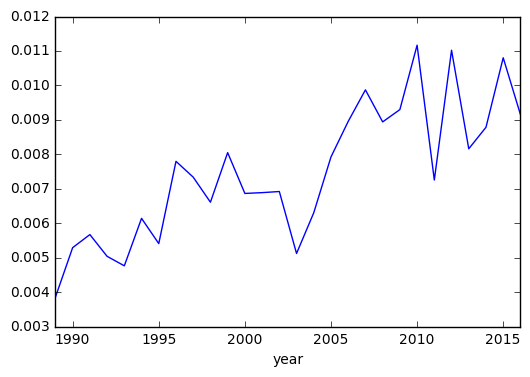

In [145]:
groupedby_year['money_ratio'].mean().plot(kind='line')
plt.show()


## Analysis on Money:

As a general trend, music has become a more popularized lyric topic over time. Though we can only speculate, our guess is that this is because as rap and hip-hop enter the mainstream in the early 1990s, and that since then lyrical topics have become increasingly commercialized. 

### A Closer Loor: Speculating on Sociological/Economic Influences 

Some of the interesting trends in this graph that we would like to discuss include: the dips of 2003, 2011, and 2013 and the peaks of 2010, 2012, and 2015. 


In researching possible mechanisms that may have influenced the first dramatic dip in 2003, we found that 2002 and 2003 saw dramatic increases in poverty and unemployment rates. Poverty increase 0.4% each year: 11.7% to 12.1% in 2002, and 12.5% from 12.1% in 2003 (Schuelke, 2003). This notable increase accounts for the 2.3 million indivduals that fell into poverty during this two year period (CNN & Reuters, 2004). We hypothesizes that this economic concern had exasterbated effects in poor, urban neighborhoods, which have historically been the historical origins of rap and hip-hop, and has leds us to believe that high poverty and unemployment rates effected the rap and hip-hop community. 


Furthermore, the spike in 2010 may be attributed to a bounceback from the 2008 recession. On September of 2010, the National Bureau of Economic Research stated that the US left the recession in June of 2009, as the GDP had recovered to 70% of the pre-recession level (onthisday.com). We speculate that this economic trend may have had sparked some inspiration for consumerism behavior. 

This increase is sharply contrasted with a dip in 2011. In researching some of the possible explanations, we found that in May of 2011, the US Department of Labor cited that more and more jobs were being created yet that in some capacities unemployment had continued to grow, as it platued at 9% for most of the year. It is possible that economic concern fueled what was to come later in the year, as in September the protests known as Occupy Wall Street began to sweap the nation. As individuals began to protest the increasing wage gap between the top 1% and the middle class, it is likely that many artists may have paused their references to money and wealth accumulation. 


The spike in 2012 introduces another interesting patteren as it completley counters the 2011 drop. We speculate that this increase in lyrical reference to money could have been a product of economic stabilization, as unemployment rates steadily decreased. We also hypothesize that it could have had some relation to Obama's reelected, as his candidcacy stood as a powerful testimate of the strength and success to many of the constituents of black America. 

In 2013 we see another stark decrease, which we speculate could have been a product of musical response to the  Black Lives Matter movement. BLM started in the summer of 2013, and we proposed that it in some capacity was able to shift the focus of the rap community to lyrical discussion of race and discrimination. This is a speculation that can only be supported if we see decrease in trends throughout different dictionaries as well.


 ## Investigation of Power 

In [146]:
power_dict = get_dict(dict_df, "power")

In [147]:
lyrics_df['power_count'] = lyrics_df['tokens_lower_clean'].apply(lambda x: dict_count(x, power_dict))

In [148]:
lyrics_df['power_ratio'] = lyrics_df['power_count'] / lyrics_df['token_count']

In [151]:
groupedby_year = lyrics_df.groupby('year')

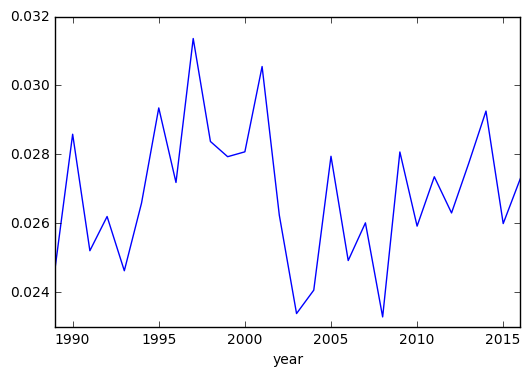

In [152]:
groupedby_year['power_ratio'].mean().plot(kind='line')
plt.show()

## Analysis on Power:

The first note worth acknowledging in this calculation is that the relevance of words associated with power is strikingly higher then those of money. As a general trend, power has keep a relatively stable general progression, though this graph definately indicates a few notable peaks and valleys. We find it interesting that lyrical reference to rap has flucuated with such steep slopes in the past twenty-five years, and moreso that power as a lyrical topic seems to be rarely affected in its introduction to the mainstream. We interpret the spike in the early 1990s to be a consequence of the emergence and popularization of "gangster rap". This graph seems to contridict our hypothesis, as we believed that reference to "gangs, ghettos, and violence" would decrease overtime, and that subsequently so would assertions of power. Our surprise can be partially nullified in that it is possible that the LIWC dictionary of power is measuring references to power that exclude or are not exclusive to "gangs, ghettos, and violence". 


### A Closer Loor: Speculating on Sociological Influences 

Some of the interesting trends in this graph that we would like to discuss include: the dips of 2002/2003 and 2008 and the peaks of 1997 and 2001. 

 
In researching possible mechanisms that may have influenced the first dramatic peak in 1997, we speulated that assertions of power may have been affected by Bill Clinton's political intiative that ended Aid to Families with Dependent Children (AFDC) and started Temporary Assistance to Needy Families (TANF) in 1996. Both of policies were and are regarded as "welfare" by the genernal public, but the different between the two is that TANF establishes much stronger work-requirements, strickter limitations to aid, revoked welfare as an entitlement, and harbors racist,  heteronormative, and marital values (Graaf and Ratliff, 2017). The three of the four goals of TANF draw reference to an idealized family formation, including the aims to: (A) "end of dependence of needy parents by promoting job preparation, work, and marriage"; (B) "prevent and reduce the incidence of out of wedlock pregnancies and establish annual numerical goals for preventing and reducing those pregnancies"; and (3) "encourage the formation and maintaitenance of two parent families" (Graaf and Ratliff, 2017). We speculate that this policy shift could have inspired increase lyrical reference to power in rap as TANF had dramatic influence on the impoverished communities of where rap and hip-hop was coming from.


This trend is sharply contrasted with a dramatic dip in 2002 and 2003. In researching some of the possible explanations, we speculate that this could have been a lyrical responce to the desolation that encompassed the nation after the 9/11 terrorist attacks in 2001. Immediately after the attacks, George W. Bush declared the "War on Terror" and in 2003 US invaded Iraq (Roberts, 2002). We speculate that such actions could have impacted mainstream culture of the time, as much of American was uncertained and scared of the potential implications of the war. Furthermore, after the attack, American cultural percetion saw increased rates of racism and discrimination, which we speculate may have discouraged assertions of power and increased fear for all demographic (Lichtblau, 2016). 


Furthermore, we speculate that the deep decline of lyrical reference to power in 2008 may be attributed to the stock market crash of 2008. The stock market crash occurred on September 29, 2008 as yhe Dow Jones Industrial Average fell 777.68 points in intra-day trading, which was the largest point drop in history" (). It had permeating effects through the US and world economy, and we speculate lyrical content may have responded to this panic with decrease reference in assertion of power. There was lots of panic. People lost homes, jobs, life-savings, and we believe that the broad reprecussion of the market crash would have caused musical artists in the mainstream to tailor their lyrics to the delicate situation of a struggling country. 


In 2013 we see another stark increase, which we  speculate could have been another lyrical response to the Black Lives Matter (BLM) movement. We believe that the LIWC dictionary would log words that are associated with the BLM as related to power as the movement was centered around "working to (re)build the Black liberation movement"(). The webpage for the movement cites its foundations as a responce to George Zimmerman acquittal after the death of Trayvon Martin, and since made efforts to advertise the "experiences of Black people in this country who actively resist our dehumanization" and state that, "#BlackLivesMatter is a call to action and a response to the virulent anti-Black racism that permeates our society.Black Lives Matter is a unique contribution that goes beyond extrajudicial killings of Black people by police and vigilantes" (). We believe that our speculation about the relation of rap lyrics and BLM movement is cooberating in our previous analysis of "money". We previously proposed that when the BLM started in 2013, the rap and hip-hop community shifted its lyrical focus from money to a a commentry on race and discrimination, but that this is a speculation that could only be supported if we saw cooberating trends in other dictionaries. As we illustrated above, we have interpreted the power analysis as consistent with this interpretation-- though we acknowledge that we lack data to make any conlusive findings.


In [166]:
df['tokens_lower_clean'] = df['tokens_lower_clean'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))

In [168]:
from sklearn.feature_extraction.text import CountVectorizer

countvec = CountVectorizer()

sklearn_dtm = countvec.fit_transform(df.tokens_lower_clean)

In [170]:
dtm_df = pandas.DataFrame(countvec.fit_transform(df.tokens_lower_clean).toarray(), columns=countvec.get_feature_names(), index = df.index)

In [173]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvec = TfidfVectorizer()
dtm_tfidf_df = pandas.DataFrame(tfidfvec.fit_transform(df.tokens_lower_clean).toarray(), columns=tfidfvec.get_feature_names(), index = df.index)

,2pacback2pacbacktheresallthesebitchesscreamingthat2pacbackalleyesonmebetterpicturemerollinridingbrandnewrimsbutthembitchesisstolenstrandedondeathrowbrendahavingmybabybutimstackingmypaperineedabrandnewmercedestheyscreaming2pacback2pacbacktheresallthesebitchesscreamingthat2pacbackhuh2pacbackimglocksstrappedrollingdowninphillythisthenewiraqsoonasihitthethehoodtheyscreamingwhogotwackeditsarecessionontheworkimscreamingwhogotcrackimsippinhennessyridingonmymuthafuckingenemiesslidinginthebackscreaminmmgmaybachmusicbitchesandtheydimesoitstennesseehailmaryputmywristonfrozepresidentialisgoldniggaplaywithmymoneymyjewellerliftinghissoulkicklikeinsoccerbulletshittinthegoalbitchimlikejohnwallcauseijustgiveemandgoplottingonthisnewicanpicturemerollingpocketslookliketheypregnantbecausethembitchesisswollengotaclipicouldloanallthemsnitchescouldholdemlookatthemmuthafuckinwheelsthembitchesisstolentheyscreaminmommyasoldierdaddyisdeadcatchtheniggathatdiditandwegoncarryhisheadfucktellemhavehiminbedtalkingdeathrowrecordstellemhavemeachairletitburnimscreamingfreemyniggaearlhesdueinnohesitationwecantevengetaturncoppedmymakavelicdandilistenedthenilearnedgrabbedmymacabovethedressermyogssayholditfirmimdreamingspittingwithpaccypherswithbigtrytosendmeupstatewithlifeasthebidhadmescrapingmywaxsleepingmyknifeinthebedtheygotaniggaonpointliketheresapriceonmyheadimgoingmaxgotmeknockingsuckersontheybackinthesecellsraisinghelltrynagetbacktothetrapbutdontevergetittwisteditsmeekmillspittinfactsplussomebodysaidtheyseenitandtheymeanitsotheysteadyscreaming,5wellyougotembothjumpmanjumpmanjumpmanthemboysuptosomethingtheyjustspentliketwoorthreeweeksoutthecountrythemboysuptosomethingtheyjustnotjustbluffingjumpmanjumpmanjumpmanthemboysuptosomething,9chaneln,abou,afraidtomakeasinglesoundafraidiwouldneverfindawayoutoutoutafraididneverbefoundididntwannagoanotherroundanangrymanspowerwillshutyouuptripwiresfillthishousewithtiptoedloverunoutofexcusesforeveryonesohereiamandiwillnotrungutsoverfearthetimeisneargutsoverfearishedatearforallthetimesiletyoupushmeroundiletyoukeepmedownnowigotgutsoverfeargutsoverfear,afuckniggathatsthatshitidontlikeasnitchniggathatsthatshitidontlikenahabitchniggathatsthatshitidontlikenahsneakdissersthatsthatshitidontlikedontlikelikedontlikelikeasnitchniggathatsthatshitidontlikenahdontlikelikedontlikelikeabitchniggathatsthatshitidontlikenahapoppedbitchthatsthatshitidontlikeigotabadbitchyeahthatbitchrightwesmokedopealldayallnightyousmokereggiethatsthatshitidontlikewegotafuckinaudithatbitchallwhitepulluponyourbitchbetshegonlikesosabitchyeahidonegonhypepistoltotinandimshootinonsightasnitchniggathatsthatshitidontlikeyourbitchwantdotheteambetshewontfightbitchwegbefuckwhodontlikeandweaintgonfightourgunsgonfightafuckniggathatsthatshitidontlikeasnitchniggathatsthatshitidontlikenahabitchniggathatsthatshitidontlikenahsneakdissersthatsthatshitidontlikedontlikelikedontlikelikeasnitchniggathatsthatshitidontlikenahdontlikelikedontlikelikeabitchniggathatsthatshitidontlikenahfaketruesthatsthatshitidontlikefakeshoesthatsthatshitidontlikefakeniggasthatsthatshitidontlikestalkingassbitchshitidontlikeidonegotindictedsellingallwhitebutiwontneversnitchnoneinmylifeikeepthisshit3hunnabitchimgoinrightwithmyniggaswhenitstimetostarttakinglifesplayingbothsidesshitthatidontlikewartimesparkbroaddayallnightplayingbothsidesshitthatidontlikewartimesparkbroaddayallnightafuckniggathatsthatshitidontlikeasnitchniggathatsthatshitidontlikenahabitchniggathatsthatshitidontlikenahsneakdissersthatsthatshitidontlikedontlikelikedontlikelikeasnitchniggathatsthatshitidontlikenahdontlikelikedontlikelikeabitchniggathatsthatshitidontlikenahimkillingtheseniggasshitthattheydontlikebroskigottheheainttrynafightgotyourbitchiwasinitallnightfredointhecutthatsascarysightyounotwiththeshitsyoucandietonightionlywantthetopiainttrynapipethemyounginswiththeshitstheybetotinpipefloatinoffatflatimighttakeflight3hunnabitchwehotwedonetookflighttakingshitdownweaintlikethepricethirstyassbitchesshitthatwedontlikeotfgbeyourbitchlik

In [175]:
print(dtm_tfidf_df.max().sort_values(ascending=False)[:20])

2pacback2pacbacktheresallthesebitchesscreamingthat2pacbackalleyesonmebetterpicturemerollinridingbrandnewrimsbutthembitchesisstolenstrandedondeathrowbrendahavingmybabybutimstackingmypaperineedabrandnewmercedestheyscreaming2pacback2pacbacktheresallthesebitchesscreamingthat2pacbackhuh2pacbackimglocksstrappedrollingdowninphillythisthenewiraqsoonasihitthethehoodtheyscreamingwhogotwackeditsarecessionontheworkimscreamingwhogotcrackimsippinhennessyridingonmymuthafuckingenemiesslidinginthebackscreaminmmgmaybachmusicbitchesandtheydimesoitstennesseehailmaryputmywristonfrozepresidentialisgoldniggaplaywithmymoneymyjewellerliftinghissoulkicklikeinsoccerbulletshittinthegoalbitchimlikejohnwallcauseijustgiveemandgoplottingonthisnewicanpicturemerollingpocketslookliketheypregnantbecausethembitchesisswollengotaclipicouldloanallthemsnitchescouldholdemlookatthemmuthafuckinwheelsthembitchesisstolentheyscreaminmommyasoldierdaddyisdeadcatchtheniggathatdiditandwegoncarryhisheadfucktellemhavehiminbedtalkingdeath

In [191]:
dtm_1989 = merged_df[merged_df['year_x']==1989]
dtm_1999 = merged_df[merged_df['year_x']==1999]
dtm_2009 = merged_df[merged_df['year_x']==2009]
dtm_2016 = merged_df[merged_df['year_x']==2014]

print("1989")
print(dtm_1989.max(numeric_only=True).sort_values(ascending=False)[0:20])
print()

print("1999")
print(dtm_1999.max(numeric_only=True).sort_values(ascending=False)[0:20])
print()

print("2009")
print(dtm_2009.max(numeric_only=True).sort_values(ascending=False)[0:20])
print()

print("2016")
print(dtm_2016.max(numeric_only=True).sort_values(ascending=False)[0:20])


KeyboardInterrupt



In [174]:
df_year = df['year'].to_frame()
merged_df = df_year.join(dtm_tfidf_df, how = 'right', lsuffix='_x')

In [190]:
df = df.dropna(subset=['lyrics'])
df_1997 = df.query(' 1996 > year > 1998')

#view the dataframe
df_1997

,track_id,track,artist,artist_gender,date,year,lyrics,lyrics_clean,tokens,tokens_lower,tokens_lower_clean,tokens_lower_clean_stopfree,tokens_lower_clean_stopfree_stem


 ## Investigation of Sex

In [153]:
sex_dict = get_dict(dict_df, "sexual")

In [154]:
lyrics_df['sex_count'] = lyrics_df['tokens_lower_clean'].apply(lambda x: dict_count(x, sex_dict))

In [155]:
lyrics_df['sex_ratio'] = lyrics_df['sex_count'] / lyrics_df['token_count']

In [156]:
groupedby_year = lyrics_df.groupby('year')

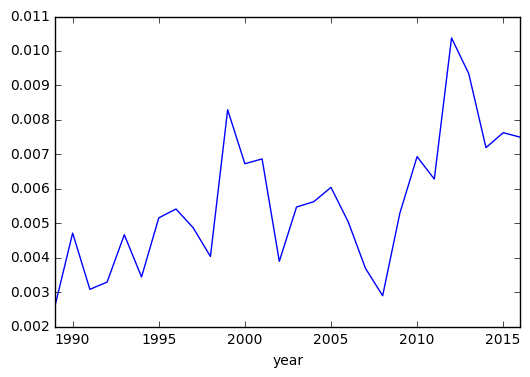

In [157]:
groupedby_year['sex_ratio'].mean().plot(kind='line')
plt.show()

## Analysis on Sex: 

As a general trend, sex has also become a more popularized lyric topic over time, though its relevance rates remain slightly lower then thoses calculated with association to "money". Again, though we can only speculate, we believe that this trend has occured as a product of rap and hip-hop entering the mainstream in the early 1990s. We believe that since then lyrical topics have become increasingly commercialized-- and as the famous quip says, "sex sells". 

 ## Investigation of Anger

In [192]:
anger_dict = get_dict(dict_df, "anger")

In [193]:
lyrics_df['anger_count'] = lyrics_df['tokens_lower_clean'].apply(lambda x: dict_count(x, anger_dict))

In [195]:
lyrics_df['anger_ratio'] = lyrics_df['anger_count'] / lyrics_df['token_count']

In [196]:
groupedby_year = lyrics_df.groupby('year')

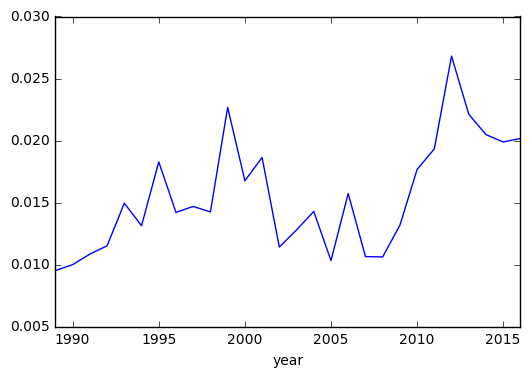

In [197]:
groupedby_year['anger_ratio'].mean().plot(kind='line')
plt.show()

## Analysis on Anger: 

It is interesting to see here that again 1999 emerges as a 

 ## Investigation of Leisure

In [198]:
leisure_dict = get_dict(dict_df, "leisure")

In [199]:
lyrics_df['leisure_count'] = lyrics_df['tokens_lower_clean'].apply(lambda x: dict_count(x, leisure_dict))

In [200]:
lyrics_df['leisure_ratio'] = lyrics_df['leisure_count'] / lyrics_df['token_count']

In [ ]:
groupedby_year = lyrics_df.groupby('year')

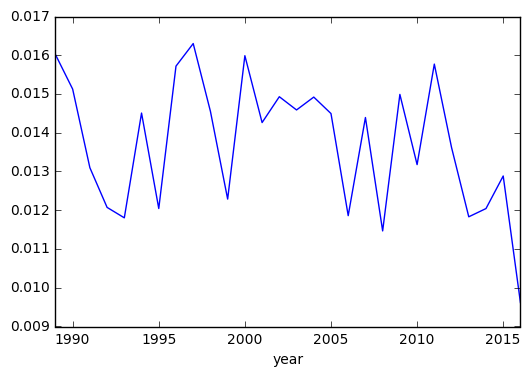

In [201]:
groupedby_year['leisure_ratio'].mean().plot(kind='line')
plt.show()

## Analysis on Leisure: 



 ## Investigation of Swear Words

In [202]:
swear_dict = get_dict(dict_df, "swear")

In [205]:
lyrics_df['swear_count'] = lyrics_df['tokens_lower_clean'].apply(lambda x: dict_count(x, swear_dict))

In [208]:
lyrics_df['swear_ratio'] = lyrics_df['swear_count'] / lyrics_df['token_count']

In [209]:
groupedby_year = lyrics_df.groupby('year')

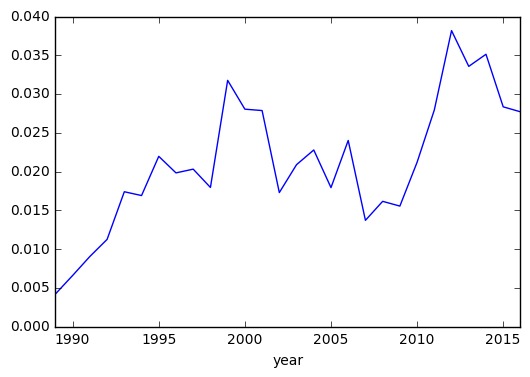

In [210]:
groupedby_year['swear_ratio'].mean().plot(kind='line')
plt.show()

## Analysis on Swear Words: 


 ## Investigation of Risk

In [203]:
risk_dict = get_dict(dict_df, "risk")

In [206]:
lyrics_df['risk_count'] = lyrics_df['tokens_lower_clean'].apply(lambda x: dict_count(x, risk_dict))

In [211]:
lyrics_df['risk_ratio'] = lyrics_df['risk_count'] / lyrics_df['token_count']

In [212]:
groupedby_year = lyrics_df.groupby('year')

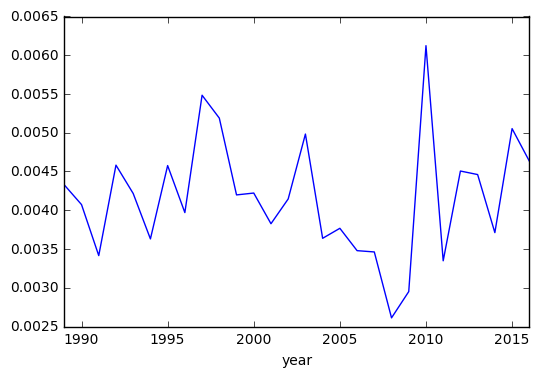

In [213]:
groupedby_year['risk_ratio'].mean().plot(kind='line')
plt.show()

## Analysis on Risk: 


 ## Investigation of Insight

In [204]:
insight_dict = get_dict(dict_df, "insight")

In [207]:
lyrics_df['insight_count'] = lyrics_df['tokens_lower_clean'].apply(lambda x: dict_count(x, insight_dict))

In [214]:
lyrics_df['insight_ratio'] = lyrics_df['insight_count'] / lyrics_df['token_count']

In [215]:
groupedby_year = lyrics_df.groupby('year')

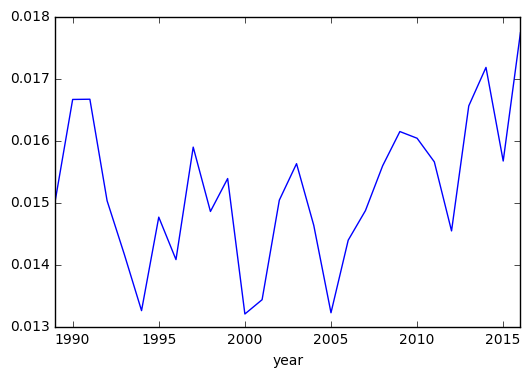

In [216]:
groupedby_year['insight_ratio'].mean().plot(kind='line')
plt.show()

## Analysis on Insight: 


# Overview Analysis on Intersectionality 

# Conclusion:



In conclusion we have found several 

conclusion (reiterate Give this consideration, we  hypothesize that as rap and hip-hop enter the mainstream in the early 1990s, we will see an increase in lyrical content that pivots from the iteration of black American experience to conventional themes in popular music such as love/sex, fame, and status/power. In your conclusion you present implications and further research beyond your immediateproject, and note any limitations to your research. ) 

# Future Steps and Limitaitons 

If we had more time there are several directions we would take this project in. Some of the ideas that we are interested 


- See how trends in the themes we have identified in mainstream rap and hip-hop have been reflected in other popular genres, are they affected by the same sociological events
- See how trends in. the themes we have identified are mediated by technological innovations in rap and hip-hop
- Use the concordanance function to look at specific lyrics in order to validate the specific referenced sociological assocations 
- It would be interesting to plot trends that compare to negative emotions to patterns of money and power, and how they overlap with our proposed sociological explanations 

# Work Cited 


CNN, & Reuters. (Aug 26, 2004). Census Bureau says 1.3 million more Americans in poverty. Retrieved May 07, 2017, from http://money.cnn.com/2004/08/26/news/economy/poverty_survey/

Graaf, G. & Ratliff, A. (2017). Social Welfare Policy, SW 112. Lecture presented in McCone Hall, at University of California, Berkeley. 

Kabango, S. (Director). (2016, September 4). Hip-Hop Evolution [Video file]. Retrieved May 5, 2017, from http://hiphopevolution.com/pages/about-the-series/

Lichtblau, E. (2016, September 17). Hate Crimes Against American Muslims Most Since Post-9/11 Era. Retrieved May 08, 2017, from https://www.nytimes.com/2016/09/18/us/politics/hate-crimes-american-muslims-rise.html

Roberts, J. (2002, September 04). Plans For Iraq Attack Began On 9/11. Retrieved May 08, 2017, from http://www.cbsnews.com/news/plans-for-iraq-attack-began-on-9-11/

Schuelke, R. (2003, December 30). Timeline of Key Economic Events in 2003. Retrieved May 07, 2017, from http://www.sonic.net/~schuelke/EconomicEvents2003.html
